In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


with open('breast-cancer-data-cleaned.csv', 'r') as file:
    header = [col.strip().replace("'", "") for col in file.readline().strip().split(',')]
    data = [
        [cell.strip().replace("'", "") for cell in line.strip().split(',')]
        for line in file.readlines()
    ]

# Convert to DataFrame
df = pd.DataFrame(data, columns=header)
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


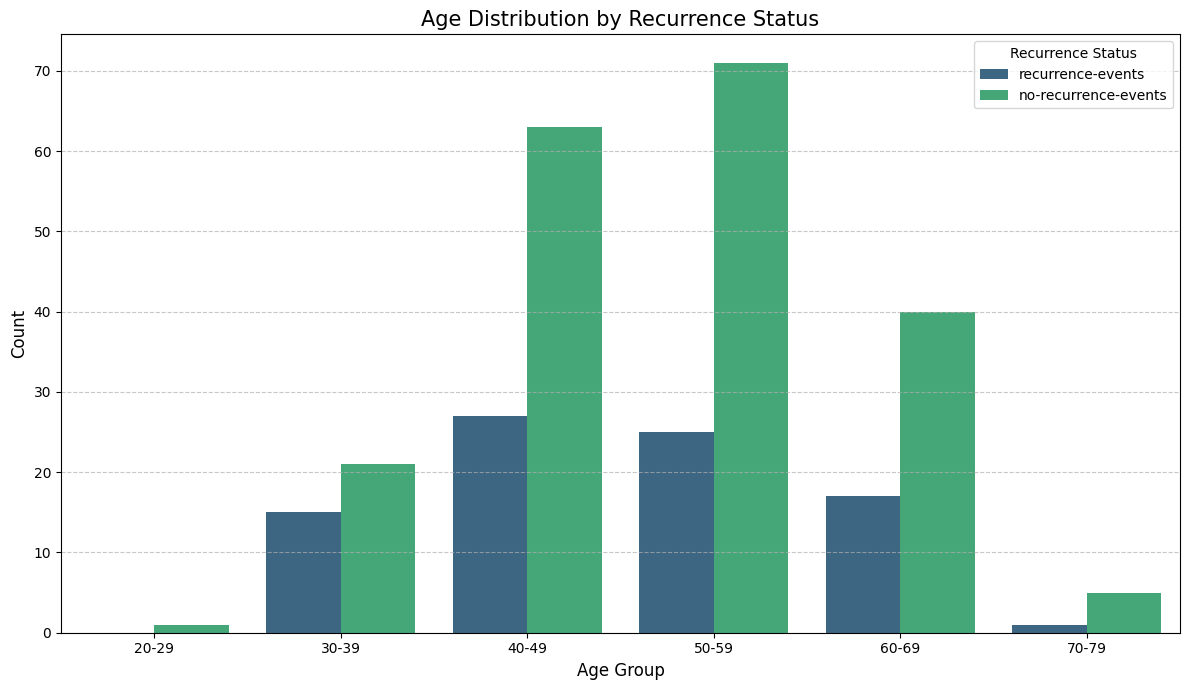

In [ ]:
plt.figure(figsize=(12, 7))
age_order = sorted(df['age'].unique())
sns.countplot(x='age', hue='class', data=df, palette='viridis', order=age_order)
plt.title('Age Distribution by Recurrence Status', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Recurrence Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

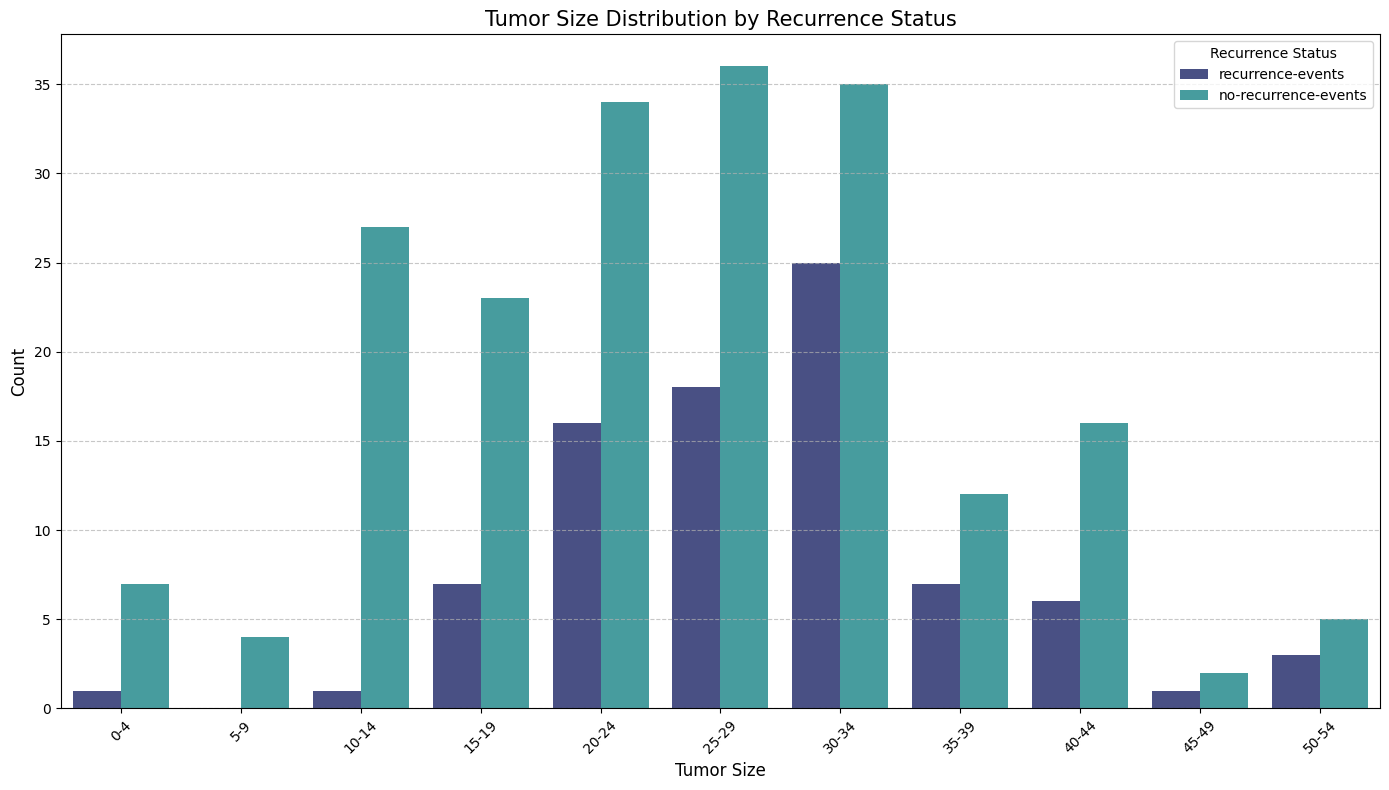

In [ ]:
plt.figure(figsize=(14, 8))
tumor_size_order = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"]
sns.countplot(x='tumor-size', hue='class', data=df, palette='mako', order=tumor_size_order)
plt.title('Tumor Size Distribution by Recurrence Status', fontsize=15)
plt.xlabel('Tumor Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Recurrence Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

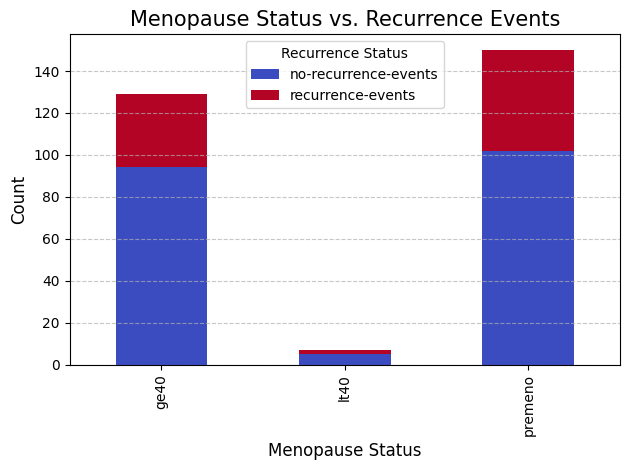

In [7]:
plt.figure(figsize=(12, 7))
menopause_class = pd.crosstab(df['menopause'], df['class'])
menopause_class.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Menopause Status vs. Recurrence Events', fontsize=15)
plt.xlabel('Menopause Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Recurrence Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

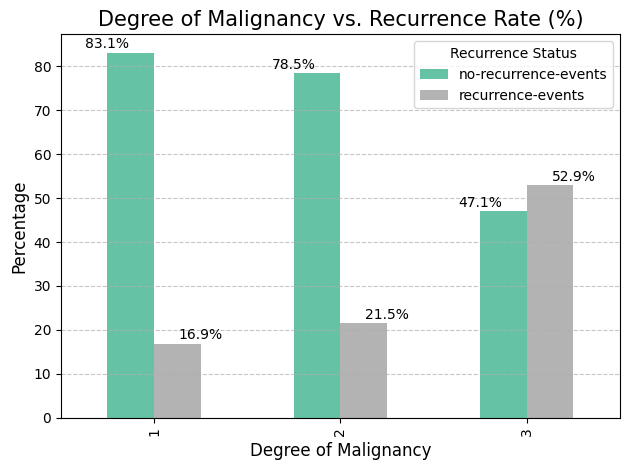

In [8]:
# Cell 5: Degree of malignancy and recurrence relationship
plt.figure(figsize=(12, 7))
deg_malig_counts = pd.crosstab(df['deg-malig'], df['class'], normalize='index') * 100
deg_malig_counts.plot(kind='bar', stacked=False, colormap='Set2')
plt.title('Degree of Malignancy vs. Recurrence Rate (%)', fontsize=15)
plt.xlabel('Degree of Malignancy', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Recurrence Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, col in enumerate(deg_malig_counts.columns):
    for j, val in enumerate(deg_malig_counts[col]):
        plt.text(j + (i-0.5)/len(deg_malig_counts.columns), val + 1, 
                 f'{val:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

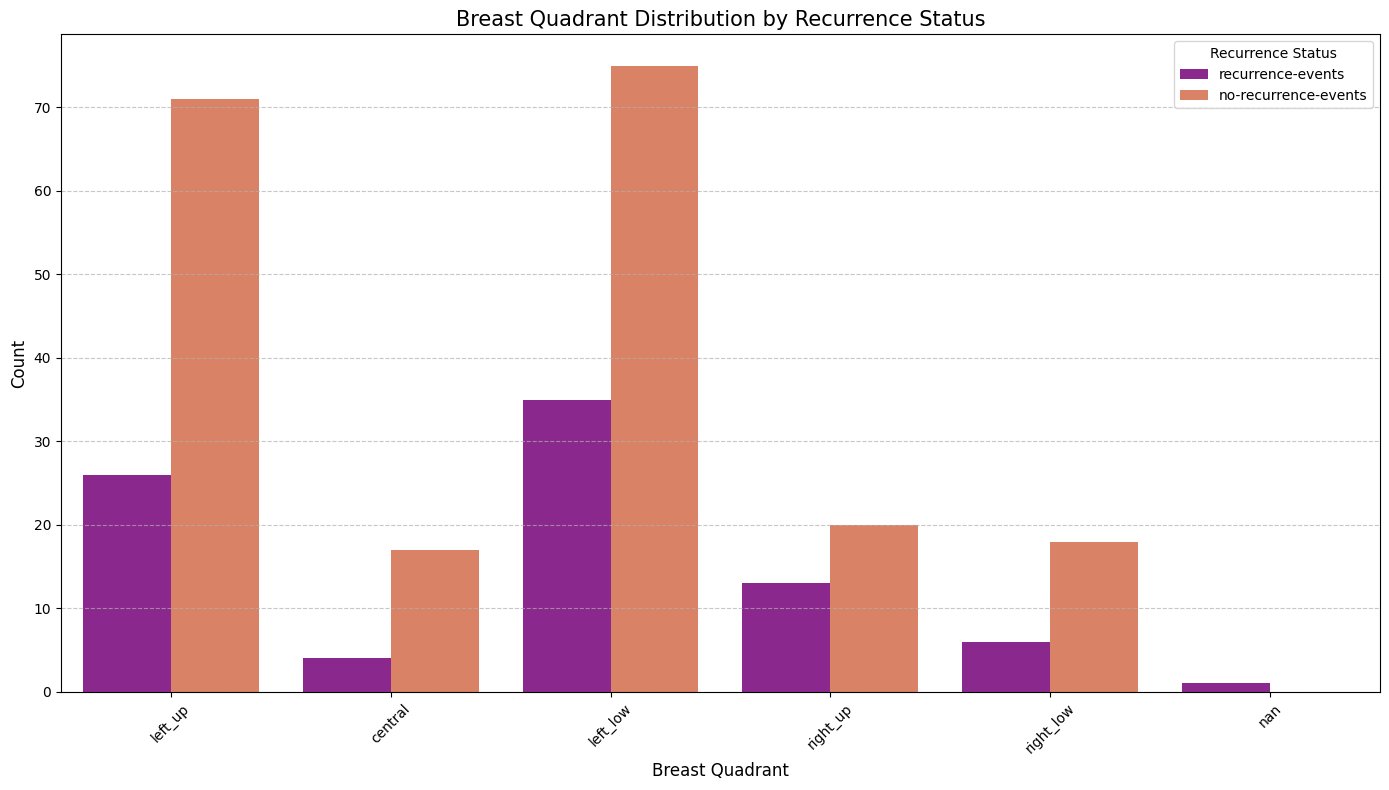

In [9]:
# Cell 6: Breast quadrant distribution and recurrence
plt.figure(figsize=(14, 8))
sns.countplot(x='breast-quad', hue='class', data=df, palette='plasma')
plt.title('Breast Quadrant Distribution by Recurrence Status', fontsize=15)
plt.xlabel('Breast Quadrant', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Recurrence Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

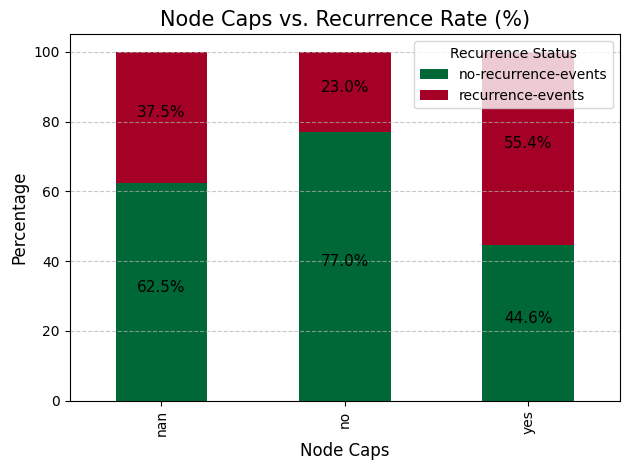

In [10]:
# Cell 7: Node caps and recurrence relationship
plt.figure(figsize=(12, 7))
nodecaps_class = pd.crosstab(df['node-caps'], df['class'], normalize='index') * 100
nodecaps_class.plot(kind='bar', stacked=True, colormap='RdYlGn_r')
plt.title('Node Caps vs. Recurrence Rate (%)', fontsize=15)
plt.xlabel('Node Caps', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Recurrence Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, (idx, row) in enumerate(nodecaps_class.iterrows()):
    cum_sum = 0
    for j, val in enumerate(row):
        plt.text(i, cum_sum + val/2, f'{val:.1f}%', ha='center', fontsize=11, color='black')
        cum_sum += val

plt.tight_layout()
plt.show()